In [1]:
# DATA PRE-PROCESSING

In [2]:
import pandas as pd

In [4]:
# Dataset contains reviews from 07/23 to 06/2024 - almost a year
data = pd.read_csv(r"C:\Users\mcss\Downloads\clean_chatgpt_reviews.csv\clean_chatgpt_reviews.csv")

In [4]:
data.head(10)

,Unnamed: 0,userName,content,score,thumbsUpCount,at
0,0,T H (Trudylh20),excellent Im impressed 👌 👏,5,0,28-06-2024 21:07
1,1,Muhammad bassam adam,perfect,5,0,28-06-2024 20:56
2,2,Chinaza Okoli,its been so helpful...love it,5,0,28-06-2024 20:54
3,3,Project House Group Ltd,It's amazing tools help me a lot with my work.,5,0,28-06-2024 20:51
4,4,Safoan Riyad,I enjoyed ChatGPT. But last update ruined ever...,1,0,28-06-2024 20:50
5,5,LEISHA PALLETT,this is the best app I've ever seen!!!,5,0,28-06-2024 20:45
6,6,M Rizwan,very Nice app,5,0,28-06-2024 20:41
7,7,Mehdi Hajavi,Your guidance is really great and you can answ...,5,0,28-06-2024 20:39
8,8,Habimana Therese,This app is very important but sometimes it gi...,4,0,28-06-2024 20:35
9,9,Xhx Bvj,Absolutely fantastic app. ChatGPT is such a ve...,5,0,28-06-2024 20:29


In [5]:
data.shape

(149719, 6)

In [5]:
data = data.drop_duplicates(keep="last")

In [6]:
data["score"].value_counts()

score
5    113738
4     17581
1      9555
3      6256
2      2589
Name: count, dtype: int64

In [7]:
data1 = data["score"].replace({4:0, 5:0, 3:2})
data1.shape

(149719,)

In [9]:
data1.value_counts()

score
0    131319
1      9555
2      8845
Name: count, dtype: int64

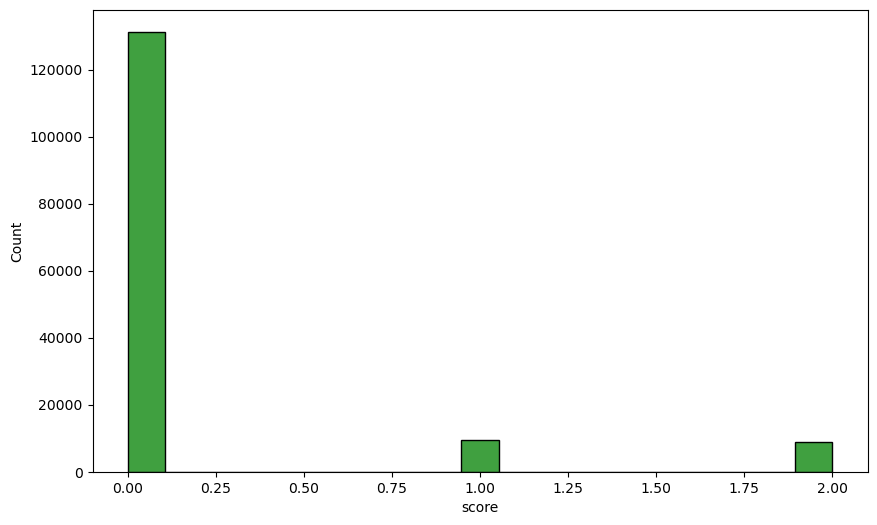

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data1, color="green")
plt.show()

In [8]:
reviews = data.iloc[:, 2]
ratings = data1.values

In [9]:
import re
def preprocess(review):
    review = re.sub(r"[^\w\s]", " ", review)
    review = review.lower()
    return review

reviews = reviews.apply(preprocess)


In [13]:
reviews

0                                excellent im impressed    
1                                                   perfect
2                             its been so helpful   love it
3            it s amazing tools help me a lot with my work 
4         i enjoyed chatgpt  but last update ruined ever...
                                ...                        
149714                                          update 2023
149715                                            its grear
149716                                        funtastic app
149717                                               hi all
149718                                   expert application
Name: content, Length: 149719, dtype: object

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Scores each word in a review and scores it based on how many times it has been used. Being used less number of times 
# indicates specificity and more number of times indicates importance.

In [11]:
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(reviews)
Y = ratings

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=1/3, random_state=42)

In [14]:
# MODEL BUILDING

In [15]:
# LOGISTIC REGRESSION

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
logreg = LogisticRegression(max_iter = 200)
logreg.fit(x_train, y_train)
predictions_lr = logreg.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [19]:
accuracy_lr = accuracy_score(y_test, predictions_lr)
cf_lr = confusion_matrix(y_test, predictions_lr)
print(accuracy_lr*100)

89.93527962009338


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns 

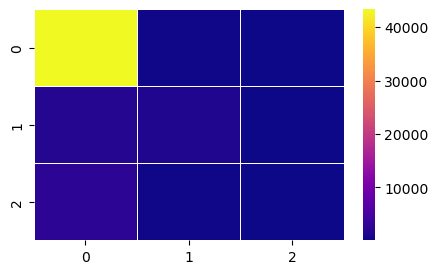

In [21]:
plt.figure(figsize=(5, 3))
sns.heatmap(cf_lr, cmap="plasma", linewidth=0.5)
plt.show()

In [22]:
# SVM

In [23]:
from sklearn.svm import SVC

In [24]:
svm = SVC()
svm.fit(x_train, y_train)
predictions_svm = svm.predict(x_test)

In [25]:
accuracy_svm = accuracy_score(y_test, predictions_svm)
cf_svm = confusion_matrix(y_test, predictions_svm)
print(accuracy_svm*100)

90.04949205522271


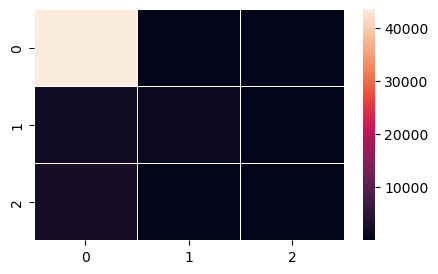

In [26]:
plt.figure(figsize=(5, 3))
sns.heatmap(cf_svm, linewidth=0.5)
plt.show()

In [ ]:
# LINEAR SVM

In [26]:
linear_svm = SVC(kernel="linear")
linear_svm.fit(x_train, y_train)
predictions_lsvm = linear_svm.predict(x_test)

In [27]:
accuracy_lsvm = accuracy_score(y_test, predictions_lsvm)
cf_lsvm = confusion_matrix(y_test, predictions_lsvm)
print(accuracy_svm*100)

90.04949205522271


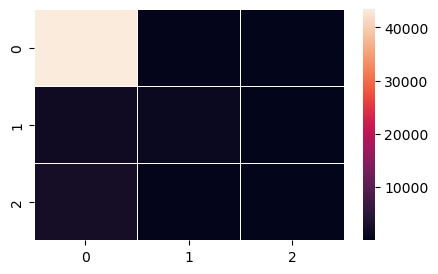

In [29]:
plt.figure(figsize=(5, 3))
sns.heatmap(cf_lsvm, linewidth=0.5)
plt.show()

In [ ]:
# Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred)

print(accuracy_dt*100)

87.89748933015409


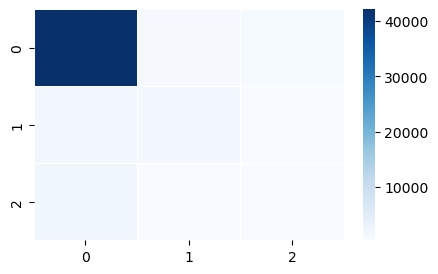

In [39]:
matrix_dt = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 3))
sns.heatmap(matrix_dt, cmap='Blues', linewidth=0.5)
plt.show()

In [ ]:
# Gradient Boost

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
predictions_gb = gb.predict(x_test)

accuracy_gb = accuracy_score(y_test, predictions_gb)

In [46]:
print(accuracy_gb*100)

88.84925962289859


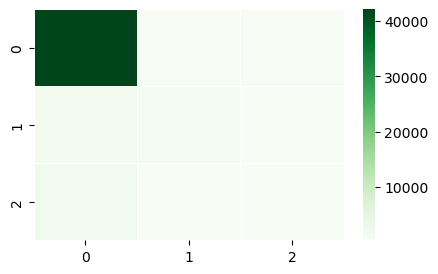

In [44]:
matrix_gb = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 3))
sns.heatmap(matrix_gb, cmap='Greens', linewidth=0.5)
plt.show()

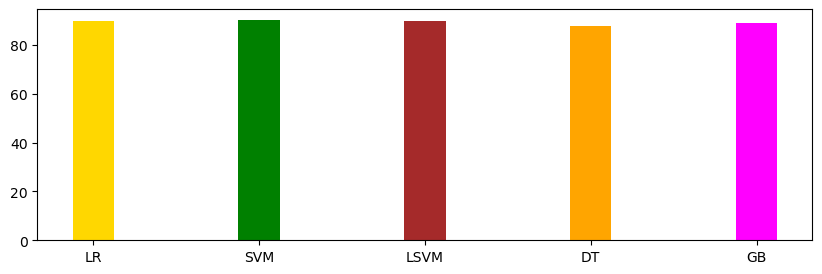

In [34]:
accuracies = [accuracy_lr*100, accuracy_svm*100, accuracy_lsvm*100, accuracy_dt*100, accuracy_gb*100]
labels = ["LR", "SVM", "LSVM", "DT", "GB"]
colors = ["gold", "green", "brown", "orange", "magenta"]

plt.figure(figsize=(10, 3))
plt.bar(labels, accuracies, color=colors, width=0.25)
plt.show()